In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

df=fetch_california_housing()
df


In [ ]:
dataset=pd.DataFrame(df.data)   #create data frame

In [ ]:
dataset.columns=df.feature_names   #Column setup


In [ ]:
dataset.head()

In [ ]:
#Set independent and dependent features
X=dataset  #independent
y=df.target  #dependent , target is output feature
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
#Train and Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=42)

In [ ]:
#implement linear regression

from sklearn.linear_model import LinearRegression

In [ ]:
#standadizing dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)    #fit_transorm is used on training data

In [ ]:
X_test=scaler.transform(X_test)  #tansform is used for test data

In [ ]:
#cross validation

from sklearn.model_selection import cross_val_score
regression=LinearRegression()
regression.fit(X_train,y_train)
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)   #CV- HOW MANY TIMES #mse=mean squared error
mse

array([-0.56799593, -0.52918854, -0.48456478, -0.51627013, -0.54833859,
       -0.47884524, -0.47828648, -0.55465187, -0.55647389, -0.54248888])

In [ ]:
np.mean(mse)

-0.5257104326777

In [ ]:
#predictionon test data
reg_pred=regression.predict(X_test)
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

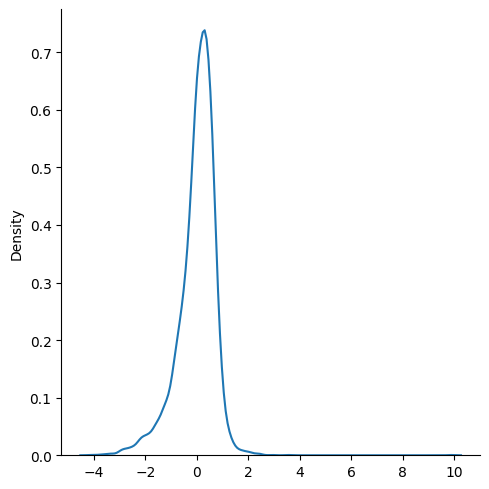

In [ ]:
#compare test prediction with truth value(y_test)

import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')  #distance plot

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score     #adjusted r2

0.3451339380943961